In [1]:
using DifferentialEquations, Plots, Test, BenchmarkTools, LinearAlgebra
using Perla1

┌ Info: Recompiling stale cache file C:\Users\Chiyoung Ahn\.julia\compiled\v1.0\Perla1\nyjg2.ji for Perla1 [c0b4307c-ed70-5091-a49a-e521e9681a02]
└ @ Base loading.jl:1184
┌ Warning: Package Perla1 does not have DifferentialEquations in its dependencies:
│ - If you have Perla1 checked out for development and have
│   added DifferentialEquations as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Perla1
└ Loading DifferentialEquations into Perla1 from project dependency, future warnings for Perla1 are suppressed.


In [2]:
function solve_transition_dynamics(Q, f_0, T)
    # solve transition dynamics given 
    # Q; N by N matrix generator
    # f_0; N vector of initial distribution
    # T; Float64 terminal time
    df(f,p,a) = Q(a)' * f
    prob = ODEProblem(df,f_0,(0.0,T))
    return solve(prob);
end

solve_transition_dynamics (generic function with 1 method)

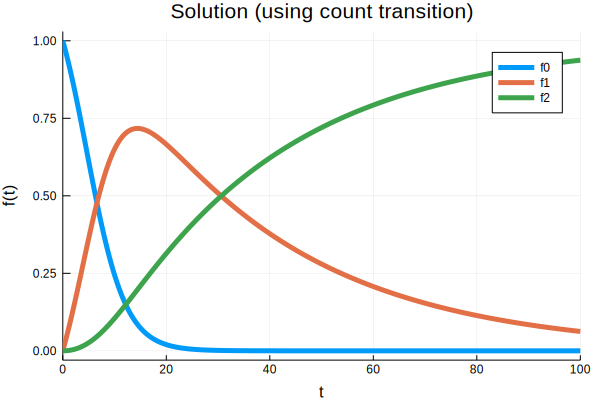

In [3]:
# simple duopoly
N = 2
T = 100.0
μ = 0.0
θ = 0.06 # baseline parameter from Perla16 (Appendix E.4)
θ_d = 0.21 # baseline parameter from Perla16 (Appendix E.4)

# define generator
Q_a = get_Q(N, μ, θ, θ_d)
Q(a) = Q_a(a)

# solve the corresponding ODE
f_0 = [1.0; 0.0; 0.0]
sol_count = solve_transition_dynamics(Q, f_0, T)

# convert to the counting solution
f0_count(a) = sol_count(a)[1]
f1_count(a) = sol_count(a)[2]
f2_count(a) = sol_count(a)[3]

# plot
plot(sol_count,linewidth=5,
    title="Solution (using count transition)",
    xaxis="t",yaxis="f(t)",label=["f0" "f1" "f2"])

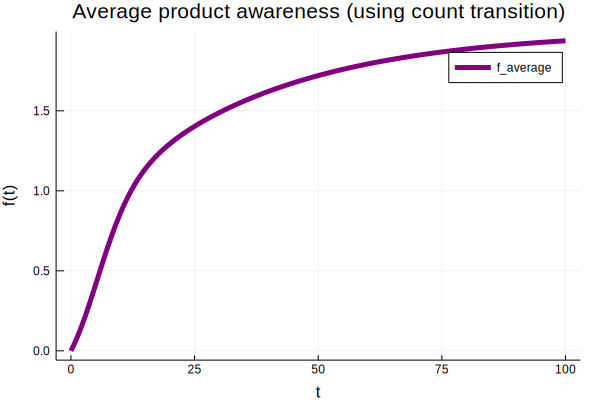

In [4]:
f_count(a) = dot(0:N, sol_count(a)) # average product awareness
plot(0:0.01:T, f_count,linewidth=5,
    title="Average product awareness (using count transition)",
    xaxis="t",yaxis="f(t)",label=["f_average"],linecolor="purple")

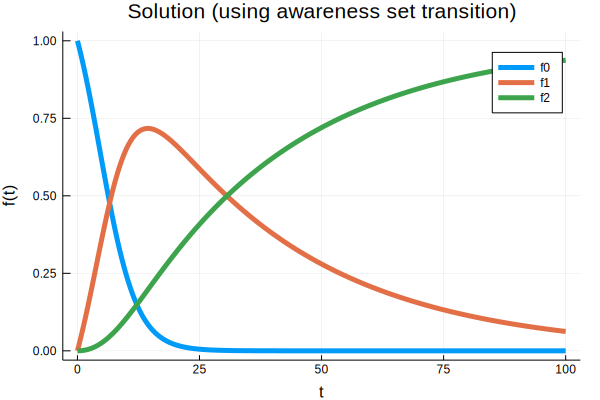

In [5]:
# simple duopoly, using awareness set
# define generator
f_hat0(a) = (θ_d + θ) / (θ_d + θ*exp((θ_d + θ)*a)) # (A.4) in appendix
f_hat_0 = [1; 0.0; 0.0; 0.0]
Q_hat(a) = [-(θ + θ_d*(1-f_hat0(a)[1])) (θ + θ_d*(1-f_hat0(a)[1]))/N (θ + θ_d*(1-f_hat0(a)[1]))/N 0.0; 
            0.0 -θ/2 0.0 θ/2;
            0.0 0.0 -θ/2 θ/2;
            0.0 0.0 0.0 0.0]

# solve the corresponding ODE
sol_awareness = solve_transition_dynamics(Q_hat, f_hat_0, T)

# convert to the counting solution
f0_awareness(a) = sol_awareness(a)[1] # no product
f1_awareness(a) = sol_awareness(a)[2] + sol_awareness(a)[3] # product 1 or product 2
f2_awareness(a) = sol_awareness(a)[4] # two products

# plot
plot(0:0.01:T, [f0_awareness, f1_awareness, f2_awareness],linewidth=5,
    title="Solution (using awareness set transition)",
     xaxis="t",yaxis="f(t)",label=["f0" "f1" "f2"])

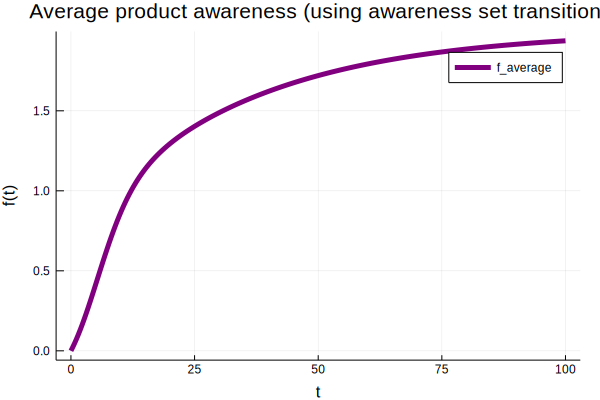

In [6]:
f_awareness(a) = dot(0:N, [f0_awareness(a); f1_awareness(a); f2_awareness(a)]) # average product awareness
plot(0:0.01:T, f_count,linewidth=5,
    title="Average product awareness (using awareness set transition)",
    xaxis="t",yaxis="f(t)",label=["f_average"],linecolor="purple")

In [7]:
@test f0_count.(0:0.1:1) ≈ f0_awareness.(0:0.1:1) atol=1e-6
@test f1_count.(0:0.1:1) ≈ f1_awareness.(0:0.1:1) atol=1e-6
@test f2_count.(0:0.1:1) ≈ f2_awareness.(0:0.1:1) atol=1e-6
@test f_count.(0:0.1:1) ≈ f_awareness.(0:0.1:1) atol=1e-6

Test Passed